# algorithms and functuality docmuntation 
in this notebook. main algorithms and funculity been documnted in real use cases.  
this docmount dosent cover all the functulity rather focuses on main ones   
##  Modules Used

| Module | Purpose |
|--------|---------|
| `src.geometry` | Roof area and orientation calculations from building polygons |
| `src.solar` | Solar energy potential, ROI, and payback period calculations |
| `src.shading` | Shadow analysis and nearby building detection |
| `src.spatial_search` | KD-tree spatial indexing and binary search algorithms |
| `src.ranking` | Suitability scoring and building classification |

In [1]:
import shapely
import scipy
import geopandas as gpd
from src.geometry import calculate_roof_orientation 
from src.geometry import BuildingGeometryProcessor 
from src.solar import calculate_solar_potential


## 1. Geometric Analysis

### Test Roof Area Calculation

In [2]:
buildings2 = gpd.read_file('../data/processed_buildings.json')
buildings2.columns

d:\Master\Q2\sci Programming for Geospatial\Project 1\Git clone\ITC-Solar-Panel-Suitability-Mapping\.venv\Lib\site-packages\geopandas\io\file.py:576: UserWarning: Error parsing datetimes, original strings are returned: Out of bounds nanosecond timestamp: 0202-09-06, at position 7797. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
  return pyogrio.read_dataframe(path_or_bytes, bbox=bbox, **kwargs)


Index(['fid', 'b3_h_50p', 'b3_h_70p', 'b3_h_max', 'b3_h_min', 'b3_dd_id',
       'identificatie', 'b3_pand_deel_id', 'b3_bag_bag_overlap',
       'b3_n_vlakken', 'b3_pw_onvoldoende', 'b3_t_run', 'b3_h_nok', 'b3_n_nok',
       'b3_extrusie', 'b3_is_glas_dak', 'b3_dak_type', 'b3_h_maaiveld',
       'b3_kas_warenhuis', 'b3_mutatie_ahn3_ahn4', 'b3_mutatie_ahn4_ahn5',
       'b3_nodata_fractie_ahn3', 'b3_nodata_fractie_ahn4',
       'b3_nodata_fractie_ahn5', 'b3_nodata_radius_ahn3',
       'b3_nodata_radius_ahn4', 'b3_nodata_radius_ahn5', 'b3_opp_buitenmuur',
       'b3_opp_dak_plat', 'b3_opp_dak_schuin', 'b3_opp_grond',
       'b3_opp_scheidingsmuur', 'b3_puntdichtheid_ahn3',
       'b3_puntdichtheid_ahn4', 'b3_puntdichtheid_ahn5', 'b3_pw_bron',
       'b3_pw_datum', 'b3_pw_selectie_reden', 'b3_rmse_lod12', 'b3_rmse_lod13',
       'b3_rmse_lod22', 'b3_volume_lod12', 'b3_volume_lod13',
       'b3_volume_lod22', 'b3_bouwlagen', 'b3_kwaliteitsindicator',
       'begingeldigheid', 'documentdat

In [3]:
#selecting samples from building dataset
b10 = buildings2['geometry'][10]
b90 = buildings2['geometry'][90]
b100 = buildings2['geometry'][100]

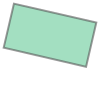

In [4]:
b10

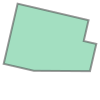

In [5]:
b90

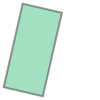

In [6]:
b100

In [7]:
#callculating roof calculate_roof_orientation
print(f'roof orientation for building b100 is : {float(calculate_roof_orientation(b100))}')
print(f'roof orientation for building b10 is : {float(calculate_roof_orientation(b10))}')
print(f'roof orientation for building b90 is : {float(calculate_roof_orientation(b90))}')

roof orientation for building b100 is : 192.82792717578417
roof orientation for building b10 is : 283.07089437953425
roof orientation for building b90 is : 103.12969238131518


## 3. ROI Analysis

### Mathematical Formula

$$ROI = \frac{E \times Price - Cost}{Cost} \times 100\%$$

In [24]:
# ROI and Payback Period Analysis
from src.solar import calculate_solar_potential, calculate_roi, calculate_payback_period
from src.geometry import calculate_roof_area

# Calculate roof area for test buildings
roof_area_b10 = calculate_roof_area(b10)
roof_area_b90 = calculate_roof_area(b90)
roof_area_b100 = calculate_roof_area(b100)

print("--- Roof Areas ---")
print(f"Building b10: {roof_area_b10:.2f} m²")
print(f"Building b90: {roof_area_b90:.2f} m²")
print(f"Building b100: {roof_area_b100:.2f} m²")

# Economic parameters
energy_price = 0.25  # €/kWh
installation_cost_per_m2 = 200  # €/m²
solar_irradiance = 1100  # kWh/m²/year (typical for Netherlands)
panel_efficiency = 0.18
shading_factor = 0.1

# Calculate solar potential and ROI for each building
buildings_list = [
    ('b10', b10, roof_area_b10),
    ('b90', b90, roof_area_b90),
    ('b100', b100, roof_area_b100)
]

print("\n--- Financial Analysis ---")
print(f"{'Building':<12} {'Energy (kWh)':<15}")
print("-" * 70)

for name, building, area in buildings_list:
    # Calculate annual energy production
    energy_kwh = calculate_solar_potential(
        area=area,
        irradiance=solar_irradiance,
        efficiency=panel_efficiency,
        shading_factor=shading_factor
    )
    
    # Calculate ROI
    roi_percent = calculate_roi(
        energy_kwh=energy_kwh,
        energy_price=energy_price,
        installation_cost_per_m2=installation_cost_per_m2,
        area=area
    )
    
    # Calculate payback period
    payback_years = calculate_payback_period(
        energy_kwh=energy_kwh,
        energy_price=energy_price,
        installation_cost_per_m2=installation_cost_per_m2,
        area=area
    )
    
 
    
    print(f"{name:<12} {energy_kwh:<15.0f} ")


--- Roof Areas ---
Building b10: 50.10 m²
Building b90: 91.29 m²
Building b100: 62.14 m²

--- Financial Analysis ---
Building     Energy (kWh)   
----------------------------------------------------------------------
b10          8927            
b90          16267           
b100         11073           


## 4. Shadow Analysis

In [19]:
# Shadow analysis - calculate shading effects from nearby buildings
from src.shading import find_nearby_buildings, calculate_shadow_length, calculate_shading_factor

# Example 1: Find nearby buildings around building b10
nearby_b10 = find_nearby_buildings(b10, buildings2, search_radius=100.0)
print(f"Found {len(nearby_b10)} buildings within 100m of building b10")
print(nearby_b10[['geometry']].head())

# Example 2: Calculate shadow length at different sun elevation angles
sun_elevations = [30, 45, 60, 75]  # degrees
building_height = 15.0  # meters (typical residential)

print("\n--- Shadow Length at Different Sun Elevations ---")
for elevation in sun_elevations:
    shadow_len = calculate_shadow_length(building_height, elevation)
    print(f"Sun elevation {elevation}°: Shadow length = {shadow_len:.2f}m")

# Example 3: Calculate shading factor for building b10
# Assuming average height of 12m for all buildings
buildings2['height'] = 12.0

shading_factor_b10 = calculate_shading_factor(
    b10, 
    building_height=12.0,
    nearby_buildings=nearby_b10,
    sun_elevation=45.0
)
print(f"\nShading factor for building b10: {shading_factor_b10}")


Found 170 buildings within 100m of building b10
                                              geometry
32   POLYGON ((118077.398 476827.094, 118070.969 47...
35   POLYGON ((118086.367 476830.531, 118084.234 47...
181  POLYGON ((118072.688 476860, 118081.766 476857...
176  POLYGON ((118071.547 476855.031, 118080.617 47...
39   POLYGON ((118065.758 476835.281, 118066.977 47...

--- Shadow Length at Different Sun Elevations ---
Sun elevation 30°: Shadow length = 25.98m
Sun elevation 45°: Shadow length = 15.00m
Sun elevation 60°: Shadow length = 8.66m
Sun elevation 75°: Shadow length = 4.02m

Shading factor for building b10: None


## 5. Spatial Search Algorithms

### KD-tree for Nearest Neighbor Search

In [18]:
# using spatial search module class : SpatialIndex
from src.spatial_search import SpatialIndex
spatial_index = SpatialIndex(buildings2)

nearest = spatial_index.find_nearest_neighbors(b10.centroid, k=5) # define 5 nearest to b10
nearest['geometry'].head()

10    POLYGON ((118162.727 476828.5, 118172.148 4768...
9     POLYGON ((118161.555 476823.469, 118170.977 47...
15    POLYGON ((118163.898 476833.562, 118173.32 476...
7     POLYGON ((118157.969 476819.062, 118169.82 476...
49    POLYGON ((118165.055 476838.531, 118174.477 47...
Name: geometry, dtype: geometry

### Binary Search for Score Threshold

In [25]:
# Binary Search for Score Threshold
from src.spatial_search import binary_search_building_by_score, find_top_k_buildings
from src.ranking import calculate_suitability_score, classify_building_suitability

# First, add suitability scores to buildings
# Calculate scores for our sample buildings
buildings2['suitability_score'] = 0.0

for idx in buildings2.index:
    geometry = buildings2['geometry'][idx]
    roof_area = calculate_roof_area(geometry)
    orientation = calculate_roof_orientation(geometry)
    
    # Calculate energy potential
    energy_kwh = calculate_solar_potential(
        area=roof_area,
        irradiance=1100,
        efficiency=0.18,
        shading_factor=0.1
    )
    
    # Calculate suitability score
    score = calculate_suitability_score(
        roof_area=roof_area,
        energy_potential=energy_kwh,
        shading_factor=0.1,
        orientation=orientation
    )
    buildings2.loc[idx, 'suitability_score'] = score

print("--- Sample Suitability Scores ---")
print(buildings2[['suitability_score']].head(10))

# Example 1: Binary search for buildings with score close to 50
target_score = 50.0
result = binary_search_building_by_score(buildings2, target_score, 'suitability_score')
print(f"\n--- Binary Search for Score {target_score} ---")
print(f"Found building with closest score: {result['suitability_score'].values[0]:.2f}")

# Example 2: Binary search for high score threshold (70)
target_score_high = 70.0
result_high = binary_search_building_by_score(buildings2, target_score_high, 'suitability_score')
print(f"\n--- Binary Search for Score {target_score_high} ---")
print(f"Found building with closest score: {result_high['suitability_score'].values[0]:.2f}")

# Example 3: Get top 10 buildings using optimized algorithm
top_10 = find_top_k_buildings(buildings2, k=10, score_column='suitability_score')
print(f"\n--- Top 10 Buildings by Suitability Score ---")
print(f"Scores: {top_10['suitability_score'].values}")


--- Sample Suitability Scores ---
   suitability_score
0          28.053512
1          34.077577
2          20.905721
3          39.152162
4          38.461515
5          37.994125
6          43.406244
7          31.641803
8          40.600247
9          38.460734

--- Binary Search for Score 50.0 ---
Found building with closest score: 50.00

--- Binary Search for Score 70.0 ---
Found building with closest score: 70.00

--- Top 10 Buildings by Suitability Score ---
Scores: [98.         98.         98.         98.         98.         97.99921951
 97.99837525 97.99750679 97.9973692  97.99520213]
